In [33]:
from igraph import Graph, plot
import igraph
import matplotlib.pyplot as plt
import numpy as np

# Gerando as classes de isomorfismo dos grafos

In [34]:
# How many isomophism classes exist for each graph size:
dic_n_graphs_isomorphism_class = {
    3: 4,
    4: 11,
    5: 34
}

def generate_graphs_isomorphism_class(n_nodes):
    graphs = []
    n_graphs_isomorphic_class = dic_n_graphs_isomorphism_class[n_nodes]
    for i in range(n_graphs_isomorphic_class):
        isoclass = Graph.Isoclass(n_nodes, i, directed=False)
        graphs.append(isoclass)
    return graphs

In [35]:
def get_indixes_nan(arr):
    return np.where(np.isnan(arr))[0]

In [36]:
def plot_isomorphism_class(graphs):
    graphs_per_row = 5

    num_graphs = len(graphs)
    num_rows = -(-num_graphs // graphs_per_row)  # This is equivalent to math.ceil(num_graphs / graphs_per_row)

    fig, axs = plt.subplots(num_rows, graphs_per_row, figsize=(15, 3 * num_rows))

    if num_rows == 1:
        axs = axs.reshape(1, -1)

    for idx, graph in enumerate(graphs):
        row = idx // graphs_per_row
        col = idx % graphs_per_row
        ax = axs[row, col]

        igraph.plot(graph, target=ax)

        ax.set_title(f"Graph {idx}")

    for i in range(num_graphs, num_rows * graphs_per_row):
        row = i // graphs_per_row
        col = i % graphs_per_row
        fig.delaxes(axs[row, col])

    fig.tight_layout()

    plt.show()


In [37]:
# Generating random graph and computing motifs histograms
n = 10  # Number of vertices
p = 0.3  # Probability of an edge between any two vertices
random_graph = Graph.Erdos_Renyi(n, p)
motifs_3 = random_graph.motifs_randesu(3)
motifs_4 = random_graph.motifs_randesu(4)
motifs_5 = random_graph.motifs_randesu(5)

In [38]:
igraph.plot(random_graph, bbox=(300, 300), margin=20)

AttributeError: Plotting not available; please install pycairo or cairocffi

## Para grafos com 3 vértices

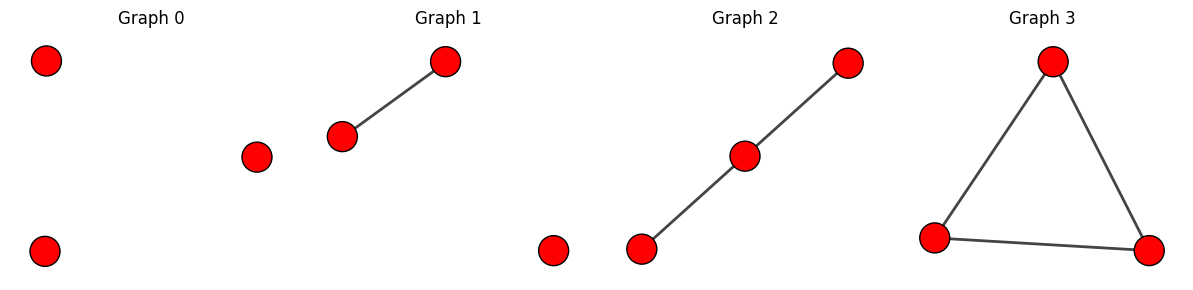

In [39]:
# Gerar classe de grafos
graphs_3 = generate_graphs_isomorphism_class(3)
plot_isomorphism_class(graphs_3)


As classes 0 e 1 são desconectadas, o que concide com os índices das entradas histograma de motifs de tamnho 3 que são nan.

In [ ]:
print(f"histograma de motifs de tamanho 3: {motifs_3}")
nan_indixes_motifs_3 = get_indixes_nan(motifs_3)
print(nan_indixes_motifs_3)

histograma de motifs de tamanho 3: [nan, nan, 15, 0]
[0 1]


## Para grafos com 4 vértices

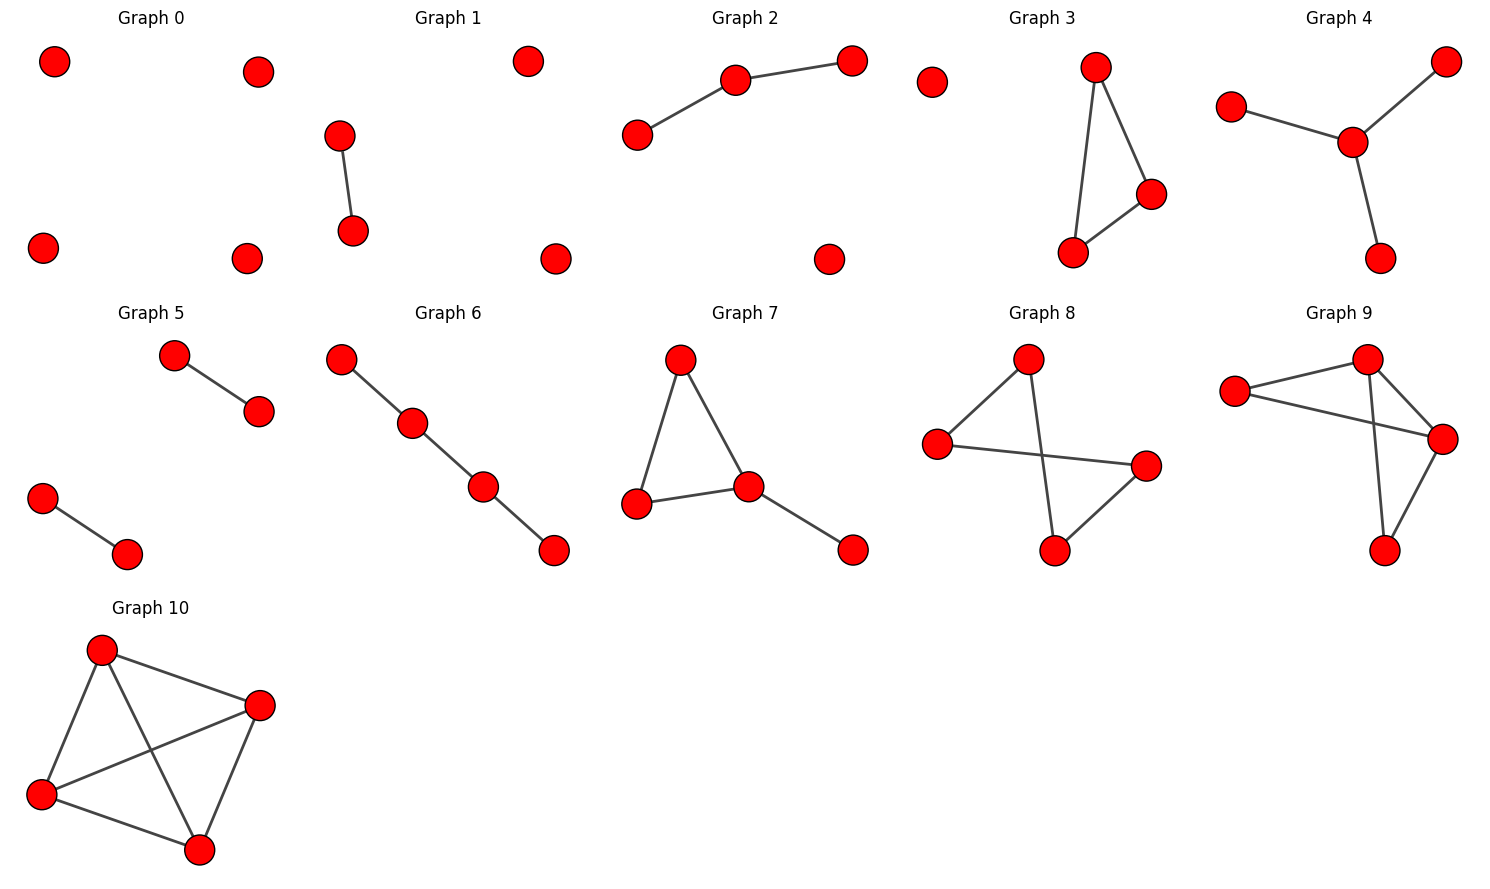

In [ ]:
graphs_4 = generate_graphs_isomorphism_class(4)
plot_isomorphism_class(graphs_4)

As classes 0, 1, 2, 3, 5 são desconectadas, o que concide com os índices das entradas histograma de motifs de tamnho 4 que são nan.

In [ ]:
print(f"histograma de motifs de tamanho 4: {motifs_4}")
nan_indixes_motifs_4 = get_indixes_nan(motifs_4)
print(nan_indixes_motifs_4)

histograma de motifs de tamanho 4: [nan, nan, nan, nan, 6, nan, 19, 0, 0, 0, 0]
[0 1 2 3 5]


## Para grafos com 5 vértices

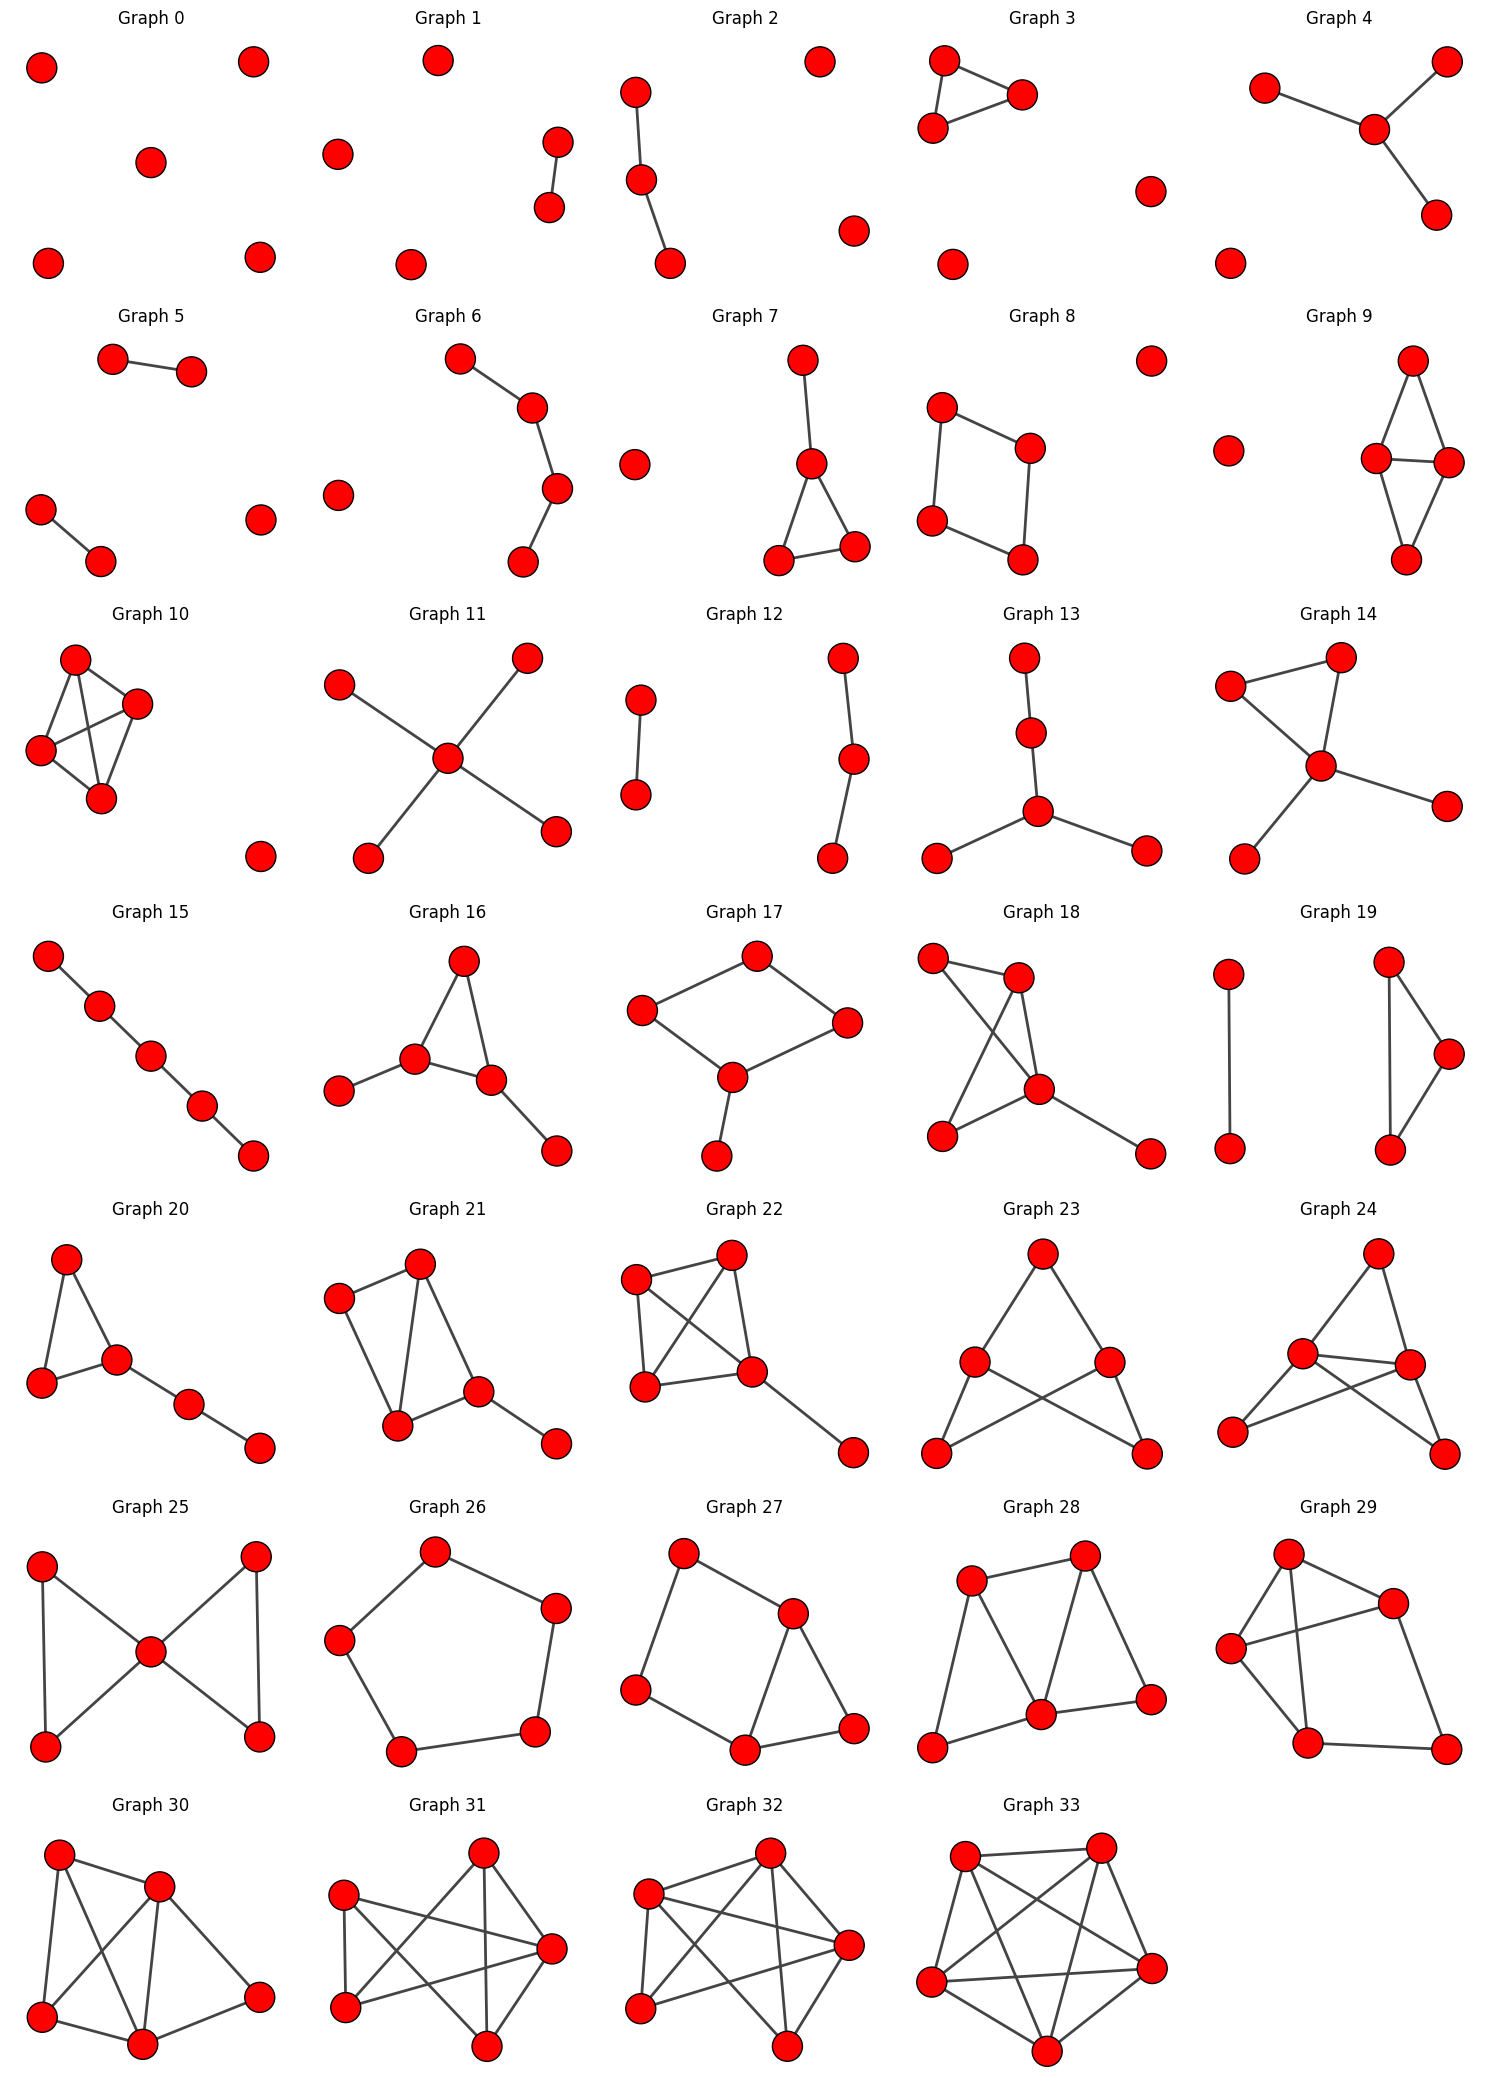

In [ ]:
graphs_5 = generate_graphs_isomorphism_class(5)
plot_isomorphism_class(graphs_5)

As classes 0,1,2,3,4,5,6,7,8,9,10,12,19 são desconectadas, o que concide com os índices das entradas histograma de motifs de tamnho 4 que são nan.

In [ ]:
print(f"histograma de motifs de tamanho 5: {motifs_5}")
nan_indixes_motifs_5 = get_indixes_nan(motifs_5)
print(nan_indixes_motifs_5)

histograma de motifs de tamanho 5: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, 21, 0, 13, 0, 0, 0, nan, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[ 0  1  2  3  4  5  6  7  8  9 10 12 19]


# Verificando a contagem de motifs

A biblioteca igraph implementa o algoritmo RAND-ESU, que é derivado do algoritmo Enumerate all Subgraphs (ESU). Este último funciona da seguinte forma, segundo a wikipédia: (https://en.wikipedia.org/wiki/Network_motif)
<img src = "ESU_alg.png">